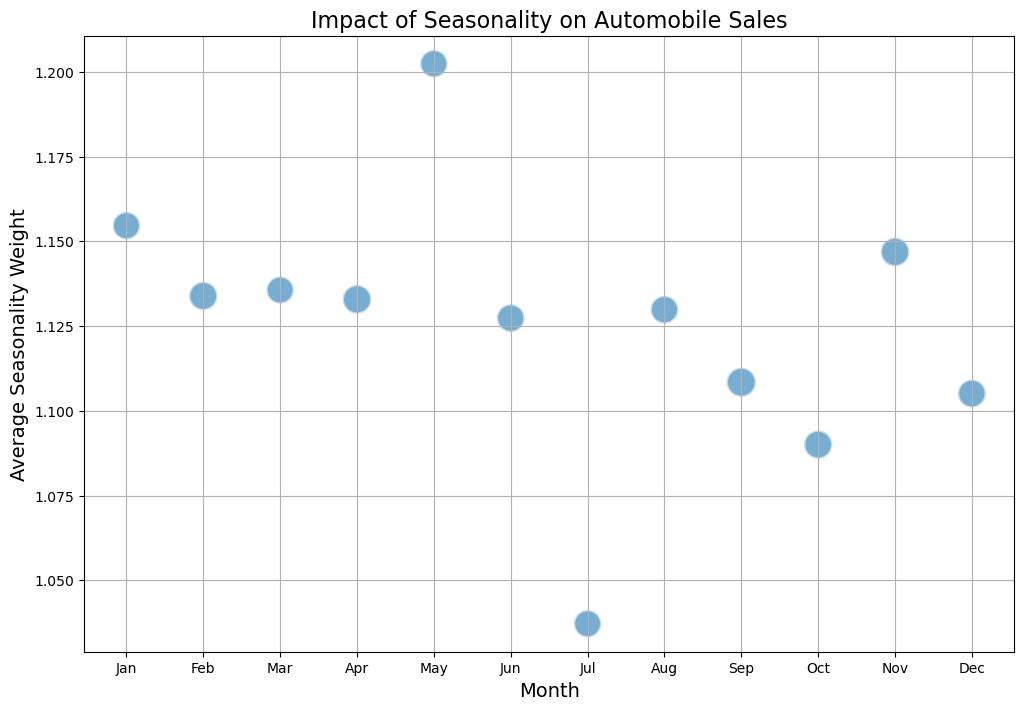

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it has been created and saved as 'automobile_sales_data.csv')
df = pd.read_csv('automobile_sales_data.csv')

# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate average sales and average seasonality weight by month
monthly_data = df.groupby('Month').agg({
    'Automobile_Sales': 'mean',
    'Seasonality_Weight': 'mean'
}).reset_index()

# Create a bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(monthly_data['Month'], monthly_data['Seasonality_Weight'], 
            s=monthly_data['Automobile_Sales'] / 10,  # Bubble size; adjust the divisor for better size representation
            alpha=0.6, edgecolors="w", linewidth=2)

# Adding titles and labels
plt.title('Impact of Seasonality on Automobile Sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Seasonality Weight', fontsize=14)
plt.xticks(monthly_data['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Save the plot as an image
plt.savefig('Bubble_Plot_Seasonality_Impact.png')

# Show the plot
plt.show()
